# **1. Sequential Bayesian Learning**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("/content/data.csv")
X = np.array(data.loc[:, 'X'])
T = np.array(data.loc[:, 'T'])

In [5]:
def sigmoid(N,M,s,X,x1,x2):
  data=[]
  for i in range(x1,x2):
    for j in range(M):
      data.append(1/(1+np.exp(-((X[i]-(2*j/M))/s))))
  data=np.array(data).reshape(N,3)
  return data

N = 5

In [6]:
N=5
M=3
s=0.6

sigmoid_data_5=sigmoid(N,M,s,X,0,5)

In [ ]:
alpha=1e-6
beta=1
inverse_S5=beta*np.matmul(sigmoid_data_5.T,sigmoid_data_5)+alpha*np.identity(3)
S5=np.linalg.inv(inverse_S5)
temp=np.matmul(sigmoid_data_5.T,T[0:5])
m5=np.matmul(S5*beta,np.matmul(sigmoid_data_5.T,T[0:5]))
sample_5=np.random.multivariate_normal(m5,S5,5)


In [8]:
x_axis=np.linspace(0,2,100)
sigmoid_x_axis=np.zeros(shape=(100,3))
for i in range(100):
  for j in range(M):
    sigmoid_x_axis[i,j]=1/(1+np.exp(-((x_axis[i]-(2*j/M))/s)))

In [9]:
def plot_N5_figure():
  plt.xticks(np.arange(0,2.5,1))
  plt.yticks(np.arange(0,5,2))
  plt.title('N = 5')
  for line in range(5):
    temp=np.matmul(sigmoid_x_axis,sample_5[line,:])
    plt.plot(x_axis,temp,color='Red')
    plt.scatter(X[line],T[line],color=['None'], marker='o', edgecolors=[0,0,1])


N = 10

In [10]:
N=5
M=3
s=0.6
sigmoid_data_10=sigmoid(N,M,s,X,5,10)
sigmoid_data_10=np.concatenate((sigmoid_data_5,sigmoid_data_10),axis=0)
inverse_S10=inverse_S5+beta*np.matmul(sigmoid_data_10.T,sigmoid_data_10)
S10=np.linalg.inv(inverse_S10)
m10=np.matmul(S10,np.matmul(inverse_S5,m5)+beta*np.matmul(sigmoid_data_10.T,T[0:10]))
sample_10=np.random.multivariate_normal(m10,S10,10)

In [11]:
def plot_N10_figure():
  plt.xticks(np.arange(0,2.5,1))
  plt.yticks(np.arange(0,5,2))
  plt.title('N = 10')
  for line in range(5):
    temp=np.matmul(sigmoid_x_axis,sample_10[line,:])
    plt.plot(x_axis,temp,color='Red')
  for point in range(10):
    plt.scatter(X[point],T[point],color=['None'], marker='o', edgecolors=[0,0,1])


N = 30

In [12]:
N=20
M=3
s=0.6
sigmoid_data_30=sigmoid(N,M,s,X,10,30)
sigmoid_data_30=np.concatenate((sigmoid_data_10,sigmoid_data_30),axis=0)
inverse_S30=inverse_S10+beta*np.matmul(sigmoid_data_30.T,sigmoid_data_30)
S30=np.linalg.inv(inverse_S30)
m30=np.matmul(S30,np.matmul(inverse_S10,m10)+beta*np.matmul(sigmoid_data_30.T,T[0:30]))
sample_30=np.random.multivariate_normal(m30,S30,30)

In [13]:
def plot_N30_figure():
  plt.xticks(np.arange(0,2.5,1))
  plt.yticks(np.arange(0,5,2))
  plt.title('N = 30')
  for line in range(5):
    temp=np.matmul(sigmoid_x_axis,sample_30[line,:])
    plt.plot(x_axis,temp,color='Red')
  for point in range(30):
    plt.scatter(X[point],T[point],color=['None'], marker='o', edgecolors=[0,0,1])


N = 80

In [14]:
N=50
M=3
s=0.6
sigmoid_data_80=sigmoid(N,M,s,X,30,80)
sigmoid_data_80=np.concatenate((sigmoid_data_30,sigmoid_data_80),axis=0)
inverse_S80=inverse_S30+beta*np.matmul(sigmoid_data_80.T,sigmoid_data_80)
S80=np.linalg.inv(inverse_S80)
m80=np.matmul(S80,np.matmul(inverse_S30,m30)+beta*np.matmul(sigmoid_data_80.T,T[0:80]))
sample_80=np.random.multivariate_normal(m80,S80,80)

In [15]:
def plot_N80_figure():
  plt.xticks(np.arange(0,2.5,1))
  plt.yticks(np.arange(0,5,2))
  plt.title('N = 80')
  for line in range(5):
    temp=np.matmul(sigmoid_x_axis,sample_80[line,:])
    plt.plot(x_axis,temp,color='Red')
  for point in range(80):
    plt.scatter(X[point],T[point],color=['None'], marker='o', edgecolors=[0,0,1])


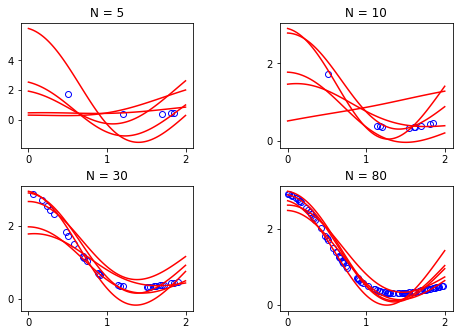

In [16]:
plt.subplot(221)
plot_N5_figure()
plt.subplot(222)
plot_N10_figure()
plt.subplot(223)
plot_N30_figure()
plt.subplot(224)
plot_N80_figure()
plt.subplots_adjust(left=0,bottom=0,right=1,top=1,wspace=0.5,hspace=0.3)
plt.show()

Predictive distribution

In [17]:
def plot_N5_predictive_distribution():
  Var_5=(1/beta)+np.matmul(np.matmul(sigmoid_x_axis,S5),sigmoid_x_axis.T)
  Var_5=np.sqrt(np.diag(Var_5))
  m_5=np.matmul(m5.T,sigmoid_x_axis.T)

  plt.xticks(np.arange(0,2.5,1))
  plt.yticks(np.arange(0,5,2))
  plt.title('N = 5')
  plt.plot(x_axis,m_5,color='Red')
  plt.fill_between(x_axis,m_5+Var_5,m_5-Var_5,facecolor='pink')

  for point in range(5):
    plt.scatter(X[point],T[point],color=['None'], marker='o', edgecolors=[0,0,1])

In [18]:
def plot_N10_predictive_distribution():
  Var_10=(1/beta)+np.matmul(np.matmul(sigmoid_x_axis,S10),sigmoid_x_axis.T)
  Var_10=np.sqrt(np.diag(Var_10))
  m_10=np.matmul(m10.T,sigmoid_x_axis.T)

  plt.xticks(np.arange(0,2.5,1))
  plt.yticks(np.arange(0,5,2))
  plt.title('N = 10')
  plt.plot(x_axis,m_10,color='Red')
  plt.fill_between(x_axis,m_10+Var_10,m_10-Var_10,facecolor='pink')

  for point in range(10):
    plt.scatter(X[point],T[point],color=['None'], marker='o', edgecolors=[0,0,1])

In [19]:
def plot_N30_predictive_distribution():
  Var_30=(1/beta)+np.matmul(np.matmul(sigmoid_x_axis,S30),sigmoid_x_axis.T)
  Var_30=np.sqrt(np.diag(Var_30))
  m_30=np.matmul(m30.T,sigmoid_x_axis.T)

  plt.xticks(np.arange(0,2.5,1))
  plt.yticks(np.arange(0,5,2))
  plt.title('N = 30')
  plt.plot(x_axis,m_30,color='Red')
  plt.fill_between(x_axis,m_30+Var_30,m_30-Var_30,facecolor='pink')

  for point in range(30):
    plt.scatter(X[point],T[point],color=['None'], marker='o', edgecolors=[0,0,1])

In [20]:
def plot_N80_predictive_distribution():
  Var_80=(1/beta)+np.matmul(np.matmul(sigmoid_x_axis,S80),sigmoid_x_axis.T)
  Var_80=np.sqrt(np.diag(Var_80))
  m_80=np.matmul(m80.T,sigmoid_x_axis.T)

  plt.xticks(np.arange(0,2.5,1))
  plt.yticks(np.arange(0,5,2))
  plt.title('N = 80')
  plt.plot(x_axis,m_80,color='Red')
  plt.fill_between(x_axis,m_80+Var_80,m_80-Var_80,facecolor='pink')

  for point in range(80):
    plt.scatter(X[point],T[point],color=['None'], marker='o', edgecolors=[0,0,1])

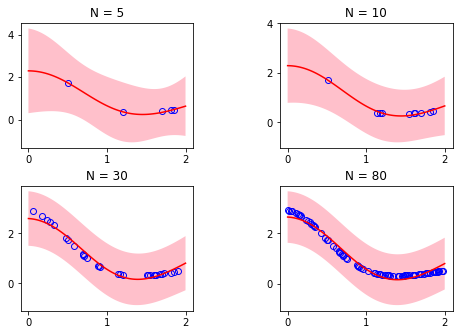

In [21]:
plt.subplot(221)
plot_N5_predictive_distribution()
plt.subplot(222)
plot_N10_predictive_distribution()
plt.subplot(223)
plot_N30_predictive_distribution()
plt.subplot(224)
plot_N80_predictive_distribution()
plt.subplots_adjust(left=0,bottom=0,right=1,top=1,wspace=0.5,hspace=0.3)
plt.show()

# **2. Logistic Regression**

In [ ]:
!unzip /content/Fashion_MNIST.zip

In [115]:
import os
import numpy as np
import matplotlib.image as mpimg

path="/content/Fashion_MNIST/"
allFileList=os.listdir(path)
print(allFileList)
trainList=[]
testList=[]
trainLabel=[]
testLabel=[]
allList=list(np.arange(64))
def train_test_split():
  for i in range(5):
    temp=np.random.choice(64,32,replace=False)
    testList.append(temp)
    trainList.append(list(set(allList).difference(set(temp))))  
def one_hot_encoding():
  for dir in allFileList:
    if(dir=='0'):
      for i in range(32):
        trainLabel.append([1,0,0,0,0])
        testLabel.append([1,0,0,0,0])
    elif(dir=='1'): 
      for i in range(32):
        trainLabel.append([0,1,0,0,0])
        testLabel.append([0,1,0,0,0])
    elif(dir=='2'):
      for i in range(32):
        trainLabel.append([0,0,1,0,0])
        testLabel.append([0,0,1,0,0])
    elif(dir=='3'): 
      for i in range(32):
        trainLabel.append([0,0,0,1,0])
        testLabel.append([0,0,0,1,0])
    elif(dir=='4'): 
      for i in range(32):
        trainLabel.append([0,0,0,0,1])
        testLabel.append([0,0,0,0,1])


def normalize(img):
  img=(img-np.mean(img))/np.std(img)
  return img

['3', '2', '4', '1', '0']


In [116]:
def softmax(y):
  exp=np.exp(y-np.max(y))
  return exp/np.sum(exp)

In [117]:
def get_gradient(hat_y,t,x):
  grad=[]
  diff=hat_y-t
  grad=(np.dot(x,diff)*(1/5))
  #for w in diff[0]:
  #  grad.append(w*x)
  #grad=np.array(grad).squeeze().T
  return grad

In [118]:
def cross_entropy(hat_y,t):
  loss=(-np.dot(np.array(t).T,np.log(hat_y+1e-6)))*(1/5)
  return loss[0]

In [119]:
train_test_split()
one_hot_encoding()

In [120]:
np.random.seed(0)
train=[]
test=[]

for i in range(5):
  subpath=os.path.join(path,allFileList[i]+'/')
  for n in range(32):
    subfile_train=os.path.join(subpath+str(trainList[i][n])+'.png')
    subfile_test=os.path.join(subpath+str(testList[i][n])+'.png')
    img_train=mpimg.imread(subfile_train)
    img_test=mpimg.imread(subfile_test)
    train.append(img_train)
    test.append(img_test)

shuff_ind=np.arange(len(train))
np.random.shuffle(shuff_ind)
train=[train[z] for z in shuff_ind]
trainLabel=[trainLabel[z] for z in shuff_ind]
test=[test[z] for z in shuff_ind]
testLabel = [testLabel[z] for z in shuff_ind]

In [121]:
def Eval_test(weights,b):
  loss=0
  acc=0

  for num in range(len(test)):
    img=test[num]
    img=normalize(img)
    img_vec=np.expand_dims(img.flatten(),axis=1)
    hat_y=softmax(np.dot(weights.T,img_vec)+b)
    if(np.argmax(hat_y)==np.argmax(testLabel[num])):
      acc+=1
    loss+=(cross_entropy(hat_y,testLabel[num]))
  return loss/int(len(test)), acc/int(len(test))
    

In [326]:
def Train_Gradient_Descent(epoch,batch_size):
  weights=np.zeros((785,5))
  lr=0.0001
  training_loss=[]
  training_acc=[]
  testing_loss=[]
  testing_acc=[]
  gradient_list=[]


  for epoch_num in range(epoch):
    temp_loss=0
    temp_acc=0

    for batch in range(int(len(train)/batch_size)):
      gradient_list=[]

      for n in range(batch*batch_size,batch_size*(batch+1)):
        img=train[n]
        img=normalize(img)
        img_vec=np.expand_dims(img.flatten(),axis=1)
        img_vec=np.vstack((np.ones(img_vec.shape[1]),img_vec))
        # For training
        hat_y=softmax(np.dot(weights.T,img_vec))
        if(np.argmax(hat_y)==np.argmax(trainLabel[n])):
          temp_acc+=1
        gradient=(np.dot(img_vec,(hat_y.T-trainLabel[n])))*(1/5)
        gradient_list.append(gradient)
        temp_loss+=(cross_entropy(hat_y,trainLabel[n]))
      
      grad_x=np.sum(np.array(gradient_list),axis=0)/len(gradient_list)
      weights=weights-lr*grad_x

    training_loss.append(temp_loss/int(len(train)))
    training_acc.append(temp_acc/int(len(train)))

    test_loss, test_acc=Eval_test(weights[1:,:],np.expand_dims(weights[0,:],axis=1))
    testing_loss.append(test_loss)
    testing_acc.append(test_acc)

  return training_loss, training_acc, testing_loss, testing_acc


In [327]:
def Newton_Raphson_method(epoch):
  weights=np.zeros((785,5))
  training_loss=[]
  training_acc=[]
  testing_loss=[]
  testing_acc=[]

  for epoch_num in range(epoch):
    temp_loss=0
    temp_acc=0
    H_list=[]
    for n in range(0,len(trainLabel)):
      img=train[n]
      img=normalize(img)
      img_vec=np.expand_dims(img.flatten(),axis=1)
      img_vec=np.vstack((np.ones(img_vec.shape[1]),img_vec))
      hat_y=softmax(np.dot(weights.T,img_vec))

      if(np.argmax(hat_y)==trainLabel[n].index(1)):
        temp_acc+=1
      gradient=(np.dot(img_vec,(hat_y.T-trainLabel[n])))*(1/5)

      H=np.dot(img_vec,img_vec.T)*np.dot(hat_y.T,1-hat_y)[0]
      H_list.append(np.dot(np.linalg.pinv(H)*np.exp(-2),gradient))

      temp_loss+=(cross_entropy(hat_y,trainLabel[n]))

    weights=weights-np.sum(np.array(H_list),axis=0)

    training_loss.append(temp_loss/int(len(train)))
    training_acc.append(temp_acc/int(len(train)))
    test_loss, test_acc=Eval_test(weights[1:,:],np.expand_dims(weights[0,:],axis=1))
    testing_loss.append(test_loss)
    testing_acc.append(test_acc)
    
  return training_loss, training_acc, testing_loss, testing_acc

**Batch GD**

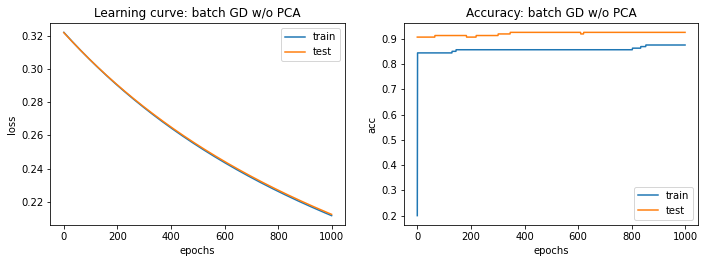

In [328]:
training_loss_GD, training_acc_GD, testing_loss_GD, testing_acc_GD=Train_Gradient_Descent(epoch=1000,batch_size=160)

plt.subplot(121)
plt.plot(training_loss_GD,label='train')
plt.plot(testing_loss_GD,label='test')
plt.title('Learning curve: batch GD w/o PCA')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.subplot(122)
plt.plot(training_acc_GD,label='train')
plt.plot(testing_acc_GD,label='test')
plt.title('Accuracy: batch GD w/o PCA')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.subplots_adjust(left=0,bottom=0,right=1.5,top=0.7,wspace=0.2,hspace=0.3)
plt.legend()
plt.show()

**SGD**

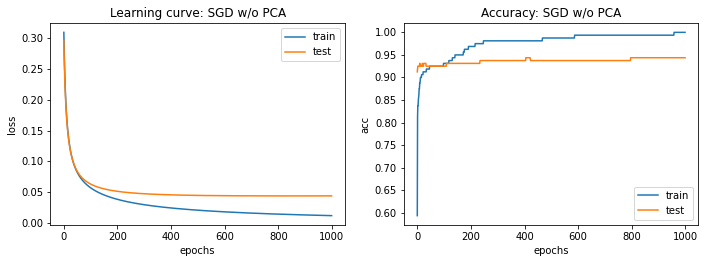

In [329]:
training_loss_SGD, training_acc_SGD, testing_loss_SGD, testing_acc_SGD=Train_Gradient_Descent(epoch=1000,batch_size=1)

plt.subplot(121)
plt.plot(training_loss_SGD,label='train')
plt.plot(testing_loss_SGD,label='test')
plt.title('Learning curve: SGD w/o PCA')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.subplot(122)
plt.plot(training_acc_SGD,label='train')
plt.plot(testing_acc_SGD,label='test')
plt.title('Accuracy: SGD w/o PCA')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.subplots_adjust(left=0,bottom=0,right=1.5,top=0.7,wspace=0.2,hspace=0.3)
plt.legend()

plt.show()

**mini-batch SGD (batch size = 32)**

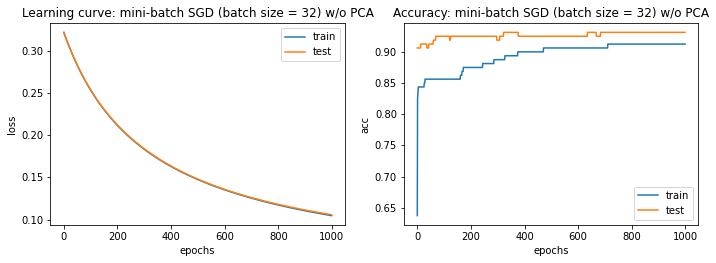

In [127]:
training_loss_MBGD, training_acc_MBGD, testing_loss_MBGD, testing_acc_MBGD=Train_Gradient_Descent(epoch=1000,batch_size=32)

plt.subplot(121)
plt.plot(training_loss_MBGD,label='train')
plt.plot(testing_loss_MBGD,label='test')
plt.title('Learning curve: mini-batch SGD (batch size = 32) w/o PCA')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.subplot(122)
plt.plot(training_acc_MBGD,label='train')
plt.plot(testing_acc_MBGD,label='test')
plt.title('Accuracy: mini-batch SGD (batch size = 32) w/o PCA')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.subplots_adjust(left=0,bottom=0,right=1.5,top=0.7,wspace=0.2,hspace=0.3)
plt.legend()

plt.show()

**Newton-Raphson algorithms** 

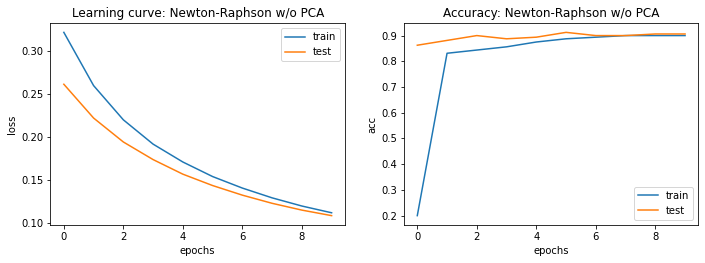

In [322]:
training_loss_Newton, training_acc_Newton, testing_loss_Newton, testing_acc_Newton=Newton_Raphson_method(epoch=10)

plt.subplot(121)
plt.plot(training_loss_Newton,label='train')
plt.plot(testing_loss_Newton,label='test')
plt.title('Learning curve: Newton-Raphson w/o PCA')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.subplot(122)
plt.plot(training_acc_Newton,label='train')
plt.plot(testing_acc_Newton,label='test')
plt.title('Accuracy: Newton-Raphson w/o PCA')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.subplots_adjust(left=0,bottom=0,right=1.5,top=0.7,wspace=0.2,hspace=0.3)
plt.legend()
plt.show()

**Show the classification results of training and test data**

In [330]:
print('TYPE: Batch gradient descent')
print('w/o PCA')
print('Training accuracy :',training_acc_GD[-1])
print('Testing accuracy :',testing_acc_GD[-1])
print()

print('TYPE: SGD')
print('w/o PCA')
print('Training accuracy :',training_acc_SGD[-1])
print('Testing accuracy :',testing_acc_SGD[-1])
print()

print('TYPE: mini-batch SGD (batch size = 32)')
print('w/o PCA')
print('Training accuracy :',training_acc_MBGD[-1])
print('Testing accuracy :',testing_acc_MBGD[-1])
print()

print('TYPE: Newton-Raphson algorithms')
print('w/o PCA')
print('Training accuracy :',training_acc_Newton[-1])
print('Testing accuracy :',testing_acc_Newton[-1])
print()

TYPE: Batch gradient descent
w/o PCA
Training accuracy : 0.875
Testing accuracy : 0.925

TYPE: SGD
w/o PCA
Training accuracy : 1.0
Testing accuracy : 0.94375

TYPE: mini-batch SGD (batch size = 32)
w/o PCA
Training accuracy : 0.9125
Testing accuracy : 0.93125

TYPE: Newton-Raphson algorithms
w/o PCA
Training accuracy : 0.9
Testing accuracy : 0.90625



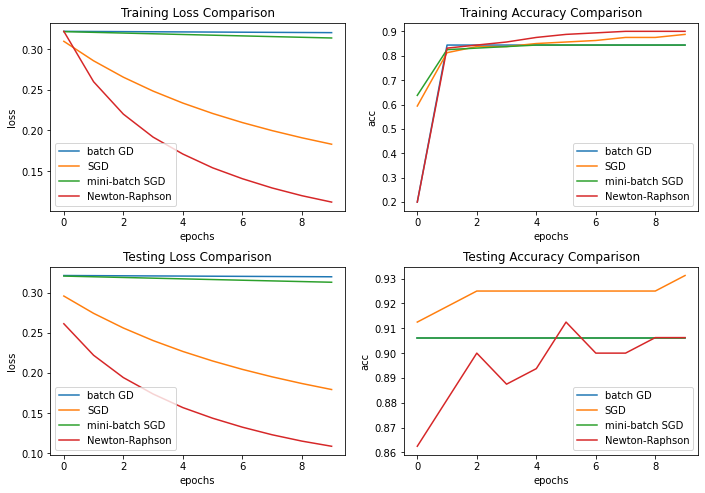

In [345]:
plt.subplot(221)
plt.title('Training Loss Comparison')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(training_loss_GD[:10],label='batch GD')
plt.plot(training_loss_SGD[:10],label='SGD')
plt.plot(training_loss_MBGD[:10],label='mini-batch SGD')
plt.plot(training_loss_Newton[:10],label='Newton-Raphson')
plt.legend()
plt.subplot(222)
plt.title('Training Accuracy Comparison')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.plot(training_acc_GD[:10],label='batch GD')
plt.plot(training_acc_SGD[:10],label='SGD')
plt.plot(training_acc_MBGD[:10],label='mini-batch SGD')
plt.plot(training_acc_Newton[:10],label='Newton-Raphson')
plt.legend()
plt.subplot(223)
plt.title('Testing Loss Comparison')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(testing_loss_GD[:10],label='batch GD')
plt.plot(testing_loss_SGD[:10],label='SGD')
plt.plot(testing_loss_MBGD[:10],label='mini-batch SGD')
plt.plot(testing_loss_Newton[:10],label='Newton-Raphson')
plt.legend()
plt.subplot(224)
plt.title('Testing Accuracy Comparison')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.plot(testing_acc_GD[:10],label='batch GD')
plt.plot(testing_acc_SGD[:10],label='SGD')
plt.plot(testing_acc_MBGD[:10],label='mini-batch SGD')
plt.plot(testing_acc_Newton[:10],label='Newton-Raphson')
plt.legend()
plt.subplots_adjust(left=0,bottom=0,right=1.5,top=1.5,wspace=0.2,hspace=0.3)

plt.show()

**Principal component analysis (PCA)**

In [173]:
def reduce_dim(sigma,d):
  d2_sigma=np.zeros((28,28))
  for i in range(d):
    d2_sigma[i,i]=sigma[i]

  return d2_sigma

In [189]:
def PCA_img(img,d):
  img=normalize(img)
  U,sigma,VT=np.linalg.svd(img)
  d_sigma=reduce_dim(sigma,d)
  PCA_train=np.dot(np.dot(U,d_sigma),VT)

  return PCA_train

In [240]:
def PCA(d):
  PCA_train=[]
  PCA_test=[]
  for n in range(len(train)): 
    img=train[n]
    img2=test[n]
    img=normalize(img)
    img2=normalize(img2)
    U,sigma,VT=np.linalg.svd(img)
    U2,sigma2,VT2=np.linalg.svd(img2)
    sigma_d=sigma[:d]
    sigma_d_test=sigma2[:d]
    PCA_train.append(sigma_d)
    PCA_test.append(sigma_d_test)

  return PCA_train, PCA_test

In [241]:
PCA_d2_train, PCA_d2_test=PCA(2)
PCA_d5_train, PCA_d5_test=PCA(5)
PCA_d10_train, PCA_d10_test=PCA(10)

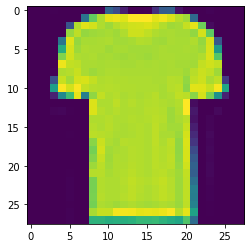

In [153]:
plt.imshow(train[30])

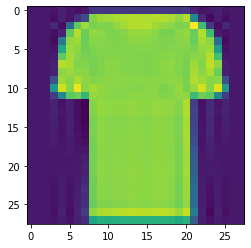

In [162]:
plt.imshow(PCA_d5_train[30])

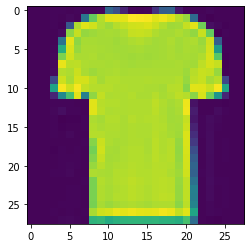

In [163]:
plt.imshow(PCA_d10_train[30])

In [348]:
def Eval_test_PCA(PCA_test,weights):
  loss=0
  acc=0

  for num in range(len(PCA_test)):

    feature=PCA_test[num]
    feature=np.expand_dims(feature,axis=1)
    feature=np.vstack((1,feature))  
    hat_y=softmax(np.dot(weights.T,feature))   
    if(np.argmax(hat_y)==np.argmax(testLabel[num])):
      acc+=1
    loss+=(cross_entropy(hat_y,testLabel[num]))

  return loss/int(len(test)), acc/int(len(test))

In [349]:
def Train_Gradient_Descent_PCA(PCA_train,PCA_test,epoch,batch_size):
  d=len(PCA_train[0])
  weights=np.zeros((d+1,5))
  lr=0.0001
  training_loss=[]
  training_acc=[]
  testing_loss=[]
  testing_acc=[]
  gradient_list=[]


  for epoch_num in range(epoch):
    temp_loss=0
    temp_acc=0

    for batch in range(int(len(PCA_train)/batch_size)):
      gradient_list=[]

      for n in range(batch*batch_size,batch_size*(batch+1)):
        feature=PCA_train[n]
        feature=np.expand_dims(feature,axis=1)
        feature=np.vstack((1,feature))  
        # For training
        hat_y=softmax(np.dot(weights.T,feature))  
        if(np.argmax(hat_y)==np.argmax(trainLabel[n])):
          temp_acc+=1
        gradient=(np.dot(feature,(hat_y.T-trainLabel[n])))*(1/5)
        gradient_list.append(gradient)
        temp_loss+=(cross_entropy(hat_y,trainLabel[n]))
      
      grad_x=np.sum(np.array(gradient_list),axis=0)
      weights=weights-lr*(grad_x/len(gradient_list))

    training_loss.append(temp_loss/int(len(PCA_train)))
    training_acc.append(temp_acc/int(len(PCA_train)))

    test_loss, test_acc=Eval_test_PCA(PCA_test,weights)
    testing_loss.append(test_loss)
    testing_acc.append(test_acc)

  return training_loss, training_acc, testing_loss, testing_acc


In [351]:
def Newton_Raphson_method_PCA(PCA_train,PCA_test,epoch):
  d=len(PCA_train[0])
  weights=np.zeros((d+1,5))
  training_loss=[]
  training_acc=[]
  testing_loss=[]
  testing_acc=[]

  for epoch_num in range(epoch):
    temp_loss=0
    temp_acc=0
    H_list=[]
    for n in range(0,len(trainLabel)):
      feature=PCA_train[n]
      feature=np.expand_dims(feature,axis=1)
      feature=np.vstack((1,feature)) 
      hat_y=softmax(np.dot(weights.T,feature))

      if(np.argmax(hat_y)==trainLabel[n].index(1)):
        temp_acc+=1
      gradient=(np.dot(feature,(hat_y.T-trainLabel[n])))*(1/5)

      H=np.dot(feature,feature.T)*np.dot(hat_y.T,1-hat_y)[0]
      H_list.append(np.dot(np.linalg.pinv(H)*np.exp(-2),gradient))

      temp_loss+=(cross_entropy(hat_y,trainLabel[n]))

    weights=weights-np.sum(np.array(H_list),axis=0)

    training_loss.append(temp_loss/int(len(train)))
    training_acc.append(temp_acc/int(len(train)))
    test_loss, test_acc=Eval_test_PCA(PCA_test,weights)
    testing_loss.append(test_loss)
    testing_acc.append(test_acc)
    
  return training_loss, training_acc, testing_loss, testing_acc

d=2

d = 2


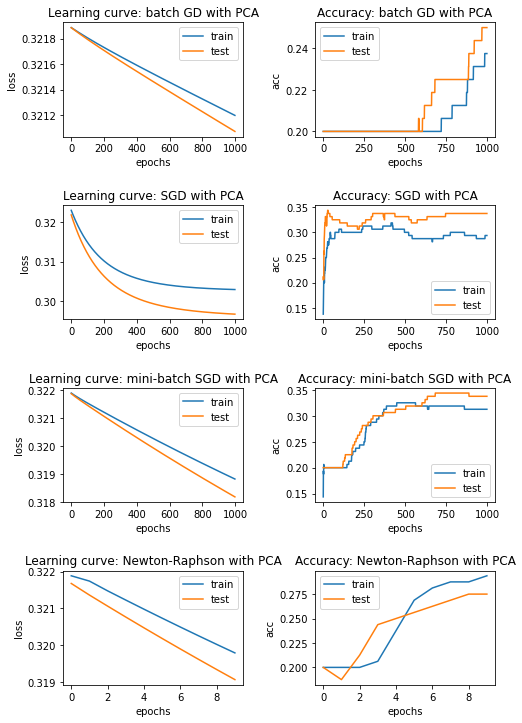

In [380]:
training_loss_GD_PCA, training_acc_GD_PCA, testing_loss_GD_PCA, testing_acc_GD_PCA=Train_Gradient_Descent_PCA(PCA_d2_train,PCA_d2_test,1000,160)
training_loss_SGD_PCA, training_acc_SGD_PCA, testing_loss_SGD_PCA, testing_acc_SGD_PCA=Train_Gradient_Descent_PCA(PCA_d2_train,PCA_d2_test,1000,1)
training_loss_MSGD_PCA, training_acc_MSGD_PCA, testing_loss_MSGD_PCA, testing_acc_MSGD_PCA=Train_Gradient_Descent_PCA(PCA_d2_train,PCA_d2_test,1000,32)
training_loss_Newton_PCA, training_acc_Newton_PCA, testing_loss_Newton_PCA, testing_acc_Newton_PCA=Newton_Raphson_method_PCA(PCA_d2_train,PCA_d2_test,epoch=10)

print('d = 2')
plt.subplot(421)
plt.plot(training_loss_GD_PCA,label='train')
plt.plot(testing_loss_GD_PCA,label='test')
plt.title('Learning curve: batch GD with PCA')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.subplot(422)
plt.plot(training_acc_GD_PCA,label='train')
plt.plot(testing_acc_GD_PCA,label='test')
plt.title('Accuracy: batch GD with PCA')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.subplot(423)
plt.plot(training_loss_SGD_PCA,label='train')
plt.plot(testing_loss_SGD_PCA,label='test')
plt.title('Learning curve: SGD with PCA')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.subplot(424)
plt.plot(training_acc_SGD_PCA,label='train')
plt.plot(testing_acc_SGD_PCA,label='test')
plt.title('Accuracy: SGD with PCA')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.subplot(425)
plt.plot(training_loss_MSGD_PCA,label='train')
plt.plot(testing_loss_MSGD_PCA,label='test')
plt.title('Learning curve: mini-batch SGD with PCA')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.subplot(426)
plt.plot(training_acc_MSGD_PCA,label='train')
plt.plot(testing_acc_MSGD_PCA,label='test')
plt.title('Accuracy: mini-batch SGD with PCA')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.subplot(427)
plt.plot(training_loss_Newton_PCA,label='train')
plt.plot(testing_loss_Newton_PCA,label='test')
plt.title('Learning curve: Newton-Raphson with PCA')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.subplot(428)
plt.plot(training_acc_Newton_PCA,label='train')
plt.plot(testing_acc_Newton_PCA,label='test')
plt.title('Accuracy: Newton-Raphson with PCA')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.subplots_adjust(left=0,bottom=0,right=1,top=2.3,wspace=0.4,hspace=0.6)
plt.legend()

plt.show()

d=5

d = 5


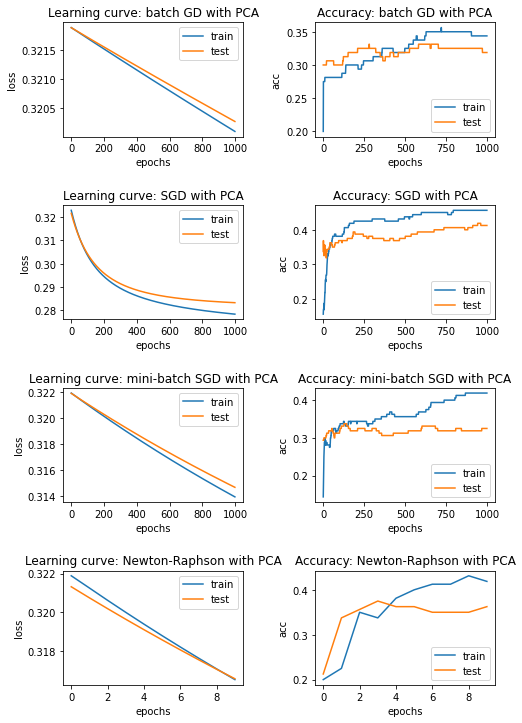

In [381]:
print('d = 5')
training_loss_GD_PCA, training_acc_GD_PCA, testing_loss_GD_PCA, testing_acc_GD_PCA=Train_Gradient_Descent_PCA(PCA_d5_train,PCA_d5_test,1000,160)
training_loss_SGD_PCA, training_acc_SGD_PCA, testing_loss_SGD_PCA, testing_acc_SGD_PCA=Train_Gradient_Descent_PCA(PCA_d5_train,PCA_d5_test,1000,1)
training_loss_MSGD_PCA, training_acc_MSGD_PCA, testing_loss_MSGD_PCA, testing_acc_MSGD_PCA=Train_Gradient_Descent_PCA(PCA_d5_train,PCA_d5_test,1000,32)
training_loss_Newton_PCA, training_acc_Newton_PCA, testing_loss_Newton_PCA, testing_acc_Newton_PCA=Newton_Raphson_method_PCA(PCA_d5_train,PCA_d5_test,epoch=10)


plt.subplot(421)
plt.plot(training_loss_GD_PCA,label='train')
plt.plot(testing_loss_GD_PCA,label='test')
plt.title('Learning curve: batch GD with PCA')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.subplot(422)
plt.plot(training_acc_GD_PCA,label='train')
plt.plot(testing_acc_GD_PCA,label='test')
plt.title('Accuracy: batch GD with PCA')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.subplot(423)
plt.plot(training_loss_SGD_PCA,label='train')
plt.plot(testing_loss_SGD_PCA,label='test')
plt.title('Learning curve: SGD with PCA')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.subplot(424)
plt.plot(training_acc_SGD_PCA,label='train')
plt.plot(testing_acc_SGD_PCA,label='test')
plt.title('Accuracy: SGD with PCA')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.subplot(425)
plt.plot(training_loss_MSGD_PCA,label='train')
plt.plot(testing_loss_MSGD_PCA,label='test')
plt.title('Learning curve: mini-batch SGD with PCA')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.subplot(426)
plt.plot(training_acc_MSGD_PCA,label='train')
plt.plot(testing_acc_MSGD_PCA,label='test')
plt.title('Accuracy: mini-batch SGD with PCA')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.subplot(427)
plt.plot(training_loss_Newton_PCA,label='train')
plt.plot(testing_loss_Newton_PCA,label='test')
plt.title('Learning curve: Newton-Raphson with PCA')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.subplot(428)
plt.plot(training_acc_Newton_PCA,label='train')
plt.plot(testing_acc_Newton_PCA,label='test')
plt.title('Accuracy: Newton-Raphson with PCA')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.subplots_adjust(left=0,bottom=0,right=1,top=2.3,wspace=0.4,hspace=0.6)
plt.legend()

plt.show()

d = 10

d = 10


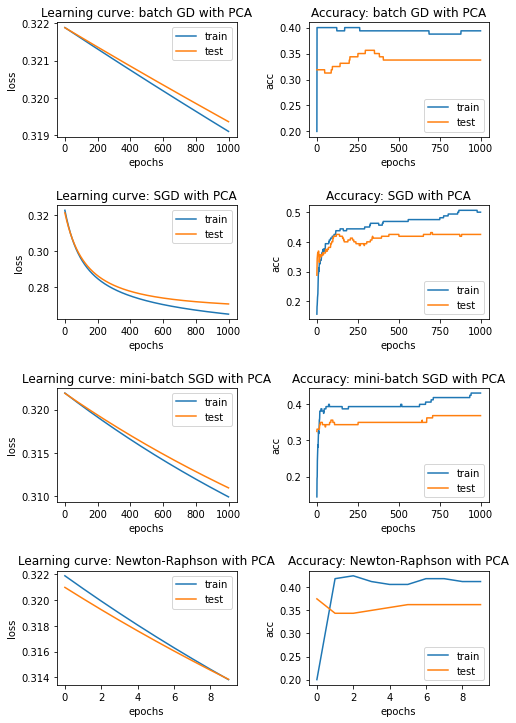

In [382]:
print('d = 10')
training_loss_GD_PCA, training_acc_GD_PCA, testing_loss_GD_PCA, testing_acc_GD_PCA=Train_Gradient_Descent_PCA(PCA_d10_train,PCA_d10_test,1000,160)
training_loss_SGD_PCA, training_acc_SGD_PCA, testing_loss_SGD_PCA, testing_acc_SGD_PCA=Train_Gradient_Descent_PCA(PCA_d10_train,PCA_d10_test,1000,1)
training_loss_MSGD_PCA, training_acc_MSGD_PCA, testing_loss_MSGD_PCA, testing_acc_MSGD_PCA=Train_Gradient_Descent_PCA(PCA_d10_train,PCA_d10_test,1000,32)
training_loss_Newton_PCA, training_acc_Newton_PCA, testing_loss_Newton_PCA, testing_acc_Newton_PCA=Newton_Raphson_method_PCA(PCA_d10_train,PCA_d10_test,epoch=10)


plt.subplot(421)
plt.plot(training_loss_GD_PCA,label='train')
plt.plot(testing_loss_GD_PCA,label='test')
plt.title('Learning curve: batch GD with PCA')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.subplot(422)
plt.plot(training_acc_GD_PCA,label='train')
plt.plot(testing_acc_GD_PCA,label='test')
plt.title('Accuracy: batch GD with PCA')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.subplot(423)
plt.plot(training_loss_SGD_PCA,label='train')
plt.plot(testing_loss_SGD_PCA,label='test')
plt.title('Learning curve: SGD with PCA')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.subplot(424)
plt.plot(training_acc_SGD_PCA,label='train')
plt.plot(testing_acc_SGD_PCA,label='test')
plt.title('Accuracy: SGD with PCA')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.subplot(425)
plt.plot(training_loss_MSGD_PCA,label='train')
plt.plot(testing_loss_MSGD_PCA,label='test')
plt.title('Learning curve: mini-batch SGD with PCA')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.subplot(426)
plt.plot(training_acc_MSGD_PCA,label='train')
plt.plot(testing_acc_MSGD_PCA,label='test')
plt.title('Accuracy: mini-batch SGD with PCA')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.subplot(427)
plt.plot(training_loss_Newton_PCA,label='train')
plt.plot(testing_loss_Newton_PCA,label='test')
plt.title('Learning curve: Newton-Raphson with PCA')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.subplot(428)
plt.plot(training_acc_Newton_PCA,label='train')
plt.plot(testing_acc_Newton_PCA,label='test')
plt.title('Accuracy: Newton-Raphson with PCA')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.subplots_adjust(left=0,bottom=0,right=1,top=2.3,wspace=0.4,hspace=0.6)
plt.legend()

plt.show()

In [394]:
X=[]
X.append([PCA_d2_train[0][0]])
print(PCA_d2_train[0][0])
print(PCA_d2_train[1][0])

25.870033
25.869627


In [ ]:
X_min,X_max=np.min(PCA_d2_train)-0.5,np.max(PCA_d2_train)+0.5
y_min,y_max=X.iloc[:,1].min()-0.5 , X.iloc[:,1].max()+0.5